In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from layers import *
from neural_network import NeuralNetwork
from utils import onehot
from data_generators import get_train_test_sorting
from data_generators import get_train_test_addition
from training import *

/var/folders/m1/0pv5jqcs6h34_x160t92550h0000gn/T/ipykernel_8599/1927056692.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Oppgave 1 - Forstå hvordan datasettene og transformermodellen er strukturert

-----------------------------------------------------------------------------------------
##### 1.1 Gi et eksempel (som i likning $(10)$) på hvordan et datasett ${x, y}$ ville sett ut for å trene en transformermodell for å predikere et heltall $d$ gitt $d = a · b + c$ der $a, c$ er tosifrede heltall, mens $b$ er et ettsifret heltall, altså $9 ≥ b ∈ Z$.

Et sett av treningsdata kan genereres ved å la x bestå av sifrene i $a, b, c$ og alle sifrene i $d$ med unntak av det siste og lar $y = d$. Dermed vil formen for x være gitt ved $x = [a_0 , \cdot \cdot \cdot, a_{r-1}, b_0, \cdot \cdot \cdot, b_{r-1}, c_0, \cdot \cdot \cdot, c_{r-1}, d_0, \cdot \cdot \cdot, d_{r-1}]$. Gitt betingelsene i oppgaven over, la $r$ = 2, $a$ = 24, $b$ = 4, $c$ = 15 og dermed <br> $d$ = 111.  som gir oss x = $[2, 4, 4, 1, 5, 1, 1]$ og $y = [1, 1, 1]$. Merk at siste siffer i $d$ ikke er del av datasettet i x.  Modellen skal da gi $\hat{z}$. Lengden av $\hat{z}$, $n$, vil være gitt av lengden av x som har med lengden $n$. $\hat{z}$ = [$\hat{z}_0$, \cdot \cdot \cdot, $\hat{z}_5$] =  $f_{\theta}([2, 4, 4, 1, 5, 1, 1])$. Ideelt er $\theta$ optimert til en slik grad at <Br> $\hat{y} = [\hat{z}_3, \hat{z}_4, \hat{z}_5] = [1, 1, 1] = y$ er korrekt predikert.

-----------------------------------------------------------------------------------------
##### 1.2) Når optimeringen er ferdig, hvordan kan vi bruke modellen $f_{\theta}$  til å predikere $d$ gitt $a, b, c$? Vis dette med et eksempel, på samme måte som i likning $(11)$.

Gitt at optmeringen er ferdig, kan modellen korrekt predikere $d$. Denne prossesen av å predikere de neste sifferene i seqvensen gjøres fra å lære av de oppgitte datasettene. Følgende tabell viser hvordan dette fungerer. La verdiene være det samme som i forrige oppgave, $r = 2, a = 24, b = 4,$<Br> $c = 15$

| Iterasjoner | Modell |
|----------|----------|
| $x^{(0)} = [2, 4, 0, 4, 1, 5]$ | $[\hat{z}_0^{(0)}, \hat{z}_1^{(0)}, \hat{z}_2^{(0)}, \hat{z}_3^{(0)}] = f_{\theta}(x^{(0)})$|
| $x^{(1)} = [2, 4, 0, 4, 1, 5, \hat{z}_3^{(0)}]$ | $[\hat{z}_0^{(1)}, \cdot \cdot \cdot, \hat{z}_4^{(1)}] = f_{\theta}(x^{(1)})$ |
| $x^{(2)} = [2, 4, 0, 4, 1, 5, \hat{z}_3^{(0)}, \hat{z}_4^{(1)}]$ | $[\hat{z}_0^{(2)}, \cdot \cdot \cdot, \hat{z}_5^{(2)}] = f_{\theta}(x^{(2)})$  |
| $x^{(3)} = [2, 4, 0, 4, 1, 5, \hat{z}_3^{(0)}, \hat{z}_4^{(1)}, \hat{z}_5^{(2)}]$ |  |

Disse predikasjonene hentes ut og returneres som $\hat{y} = [\hat{z}_3^{(0)}, \hat{z}_4^{(1)}, \hat{z}_5^{(2)}]$ som bør være likt $y$.

-----------------------------------------------------------------------------------------
##### 1.3) Anta at vi bruker cross-entropy som objektfunksjon, at $m = 5$ og $y = [4, 3, 2, 1]$. Hvilke diskret sannsynlighetsfordeling $\hat{Y}$ ville gitt en objektfunksjon $L(θ, D) = 0$? Hva ville $\hat{y}$ vært i dette tilfellet?

Cross entropy er gitt ved $L(θ, D) = -\frac{1}{D \cdot n} \sum_{i=0}^{D-1} \sum_{j=0}^{n-1} \log \hat{Y}_{k,j}^{(i)}$ hvor $D$ er datapunktene, $\theta $
er parameterne, og $\hat{Y}$ er sannsynlighetsfordelingen til den predikterte modellen, samt er $j$ og $i$ dimensjonene til $\hat{Y}$. Det objektfunksjonen gjør er å sammenligne onehot(y) med $\hat{Y}$. Hvis $L(θ, D) = 0$ vil den optimerte modellen og onehot(y) være identiske. Når dette inntreffer vil $argmax_{\text{col}}(\hat{Y})$ = $\hat{y}$ som igjen er lik $y$. I dette tilfellet er $y = [4,3,2,1]$, som også vil være lik $\hat{y}$.
$\hat{Y}$ vil være gitt av den diskrete sannsynlighetsfordelingen:<Br><Br> $\hat{Y}$ =
$\left[\begin{array}{ccc}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
1 & 0 & 0 & 0\\
\end{array}\right]$ , <Br><Br> som er lik onehot($[4,3,2,1]$). Dette betyr i praksis at paramtetrene i transformenmodellen klarer å prediktere hva som kommer videre i sekvensen og vi ender opp med samme antatt løsning ($\hat{y}$) som faktisk løsning.




-----------------------------------------------------------------------------------------
##### 1.4) Gitt $d, m, n_{max}, k, p$ og $L$. Hvor mange enkeltparametre har en transformermodell? Med enkeltparametre mener vi hvor mange tall $w ∈ R$ vi må bestemme ved optimering. En matrise $W ∈ R^{m×n}$ består av $m · n$ tall eller enkeltparametre.

Med gitte variabler for $d, m, n_{max}, k, p$ og  $L$ er antall enkeltparametre mulig å bestemme. Enkeltparametre er gitt med $w \in \mathbb{R}$ noe som uttrykkes med å se på dimensjoner for ulike parametermatriser i transformermodellen.

$W_E$ og $W_P$ har henholdsvis dimensjonene $W_E \in \mathbb{R}^{d \times m}$ og $ W_P \in \mathbb{R}^{d \times n_{max}} $ som representerer parametermatrisen til en sekvens for x med lengde n, som skrives som $z_0$. I tilegg ønskes det å gjøre $L$ paramtriserte trasformasjoner på $z_0$, så man ender opp med $L \cdot (d \times m + d \times n_{max})$ for embedding delen av enkeltparamtrene. Under unenbeddingen oppstår en ny parametermatrise $W_U$ som er en sekvens med lengde $n$ med heltall opp til $m$, den har dimensjonene $ W_U \in \mathbb{R}^{d \times m} $. Attention-lag bidrar også til antall enkeltparamtre for transformmodellen, der har man 4 parametermatriser; $W_O, W_V, W_Q, W_K$ alle med samme dimensjon $\mathbb{R}^{k \times d} $. Transformermodellen har også en $feed$-$forward $ del som bidrar med to paramtermatriser $W_1$ og $W_2$ begge med dimensjoner $\mathbb{R}^{p \times d} $


Hvis man tar disse parametermatrisene i betrakning og antar at $k < d < p$ vil man ha: 
$w = d \times m+L\cdot (d \times m + d \times n_{max}) + 4 \cdot k \times d + 2 \cdot p \times d $, enkeltparametre. (siden k og p er heltall man bestemmer selv er dette en rimelig antagelse å ta).


-----------------------------------------------------------------------------------------
##### 1.5 Transformermodellen er gitt i likningene $(4) - (9)$. La $n = n_{max} = 1,$  $m = d = k = p=2$ og $L=1$. Anta videre at $W_O = W_V = W_Q = W_K = W_1 = W_2 = W_U = I_{2×2}$ og at $σ(x) = Relu(x) = max(0, x)$. Dersom <Br> $W_E = \left[\begin{array}{ccc} 1 & 0 \\ 0 & \alpha \end{array} \right]$ , og $W_P$ = $\left[\begin{array}{ccc} 1 \\ 0 \end{array} \right]$ vis at vi må ha $\alpha > 1$ for å få  $\hat{z} = [1]$ som output når input er $x = [1]$.
*  *  *  * * * * * * * * * * * * * *

Med variablene oppgitt i oppgaven $L=n = n_{max}= x = 1$ og $m=d=k=p=d = 2$ og alle parametermatrisene lik

$\left[\begin{array}{ccc}
1 & 0 \\
0 & 1 
\end{array}\right]$ = $ I_{2\times 2}$ , utenom $W_E = \left[\begin{array}{ccc}
1 & 0 \\
0 & \alpha
\end{array}\right]$ , og $W_P = \left[\begin{array}{ccc}
1 \\
0 
\end{array}\right]$

Med dette oppgitt vil  $ X = onehot(x) = \left[\begin{array}{ccc}0 \\1 
\end{array}\right]$ som resulterer i en $z_0 = \left[\begin{array}{ccc}0 \\ \alpha 
\end{array}\right]+ \left[\begin{array}{ccc}1 \\ 0 
\end{array}\right]$ =$\left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]$. For å videre bestemme et uttrykk for $\hat{z}$ må vi se på hva transformermodellen gjør med $z_0$. 

Videre er $z_{1/2}$ = $z_0 + W_O^T  W_V  z_0 A(z_0)$, hvor $A(z_0)$ = $softmax_{col}(z_0^T W_Q^T W_K z_0+D)$ og D sørger for at den strengt nedre delen av A er 0.
Ved å løse $A(z_0)$ får man utrykket $(1+ \alpha ^2)$ i softmax funksjonen.

$z_{1/2} = \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right] + I_{2 \times 2} I_{2 \times 2} \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right] softmax(1+ \alpha ^2)$ = $ 2 \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]$ ettersom softmax av et utrykk tilsvarer å dele på seg selv i e-potens, som resulterer at utrykket blir lik 1.

for $z_1$ får vi et uttrykk som er $z_{1/2} + W_2^T \sigma (W_1 z_{1/2})$, $\sigma$ er en aktiveringsfunskjon, i dette tilfelle kan man bruke $relu(W_1 z_{1/2})$.
Utrykket blir da:

$z_1 = 2  \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]+ I_{2 \times 2} max(0,I_{2 \times 2} 2 \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]) $ = $ 4  \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]$
 
Ved hjelp av $z_1$ kan man ta i bruk likning $(8)$ for å finne sannsynlighetsfunksjonen $Z$.

 $Z = softmax_{col}(W_U^T Z_1)$ $,$ her vil argumentet $W_U^T z_1$ bli lik $z_1$, og softmax vil returnere $Z = \frac{1}{e^4 + e^{4 \alpha}} \left[\begin{array}{ccc}e^4 \\ e^{4 \alpha }
\end{array}\right]$

for å få $\hat{z} = [1]$ må $argmax(Z)$ bli 1, og dette krever at verdien på indeks [1] må være større enn den på indeks [0], da må $e^4 < e^{4 \alpha}$ og dette impliserer at $\alpha >1$ 


---------------------------------------------------------------------------------
## Oppgave 2 - Objektorientert programmering for transformermodell

##### 2.1 I den utdelte koden layers.py og neural network.py finnes en objektorientert implementering av et nevralt nettverk som kan ha lineære lag og en Relu- aktiveringsfunksjon. I tillegg er embedding og posisjonsenkoding samt feed-forward lag implementert.<Br> Forklar hvordan NeuralNetwork bruker arv, eller inheritance, for å utføre en iterasjon av gradient descent (stepgd()) hvis vi antar det er initiert med minst ett LinearLayer i listen layers.

Et nevralt nettverk lærer gjennom mange små gradevis forbedringer gjort gjennom å prøve og feile. Denne prossen består av mange ulike funksjoner og operasjoner, som beskrevet i forrige oppgave. Dette gjøres med formålet om å utføre en gradient descent. Før at det nevralenettverket skal fungere må layers initieres.
 
Layers er en klasse som fungerer som en base klasse for alle andre typer layers i nettverket, som representerer de ulike prossesene det nevralenettveket utfører. Her implementeres en basis versjon av metoder som forward(), backward() og step_gd(). Dette vil si at hvis et objekt arver fra Layers klassen så vil det objektet har metodene forward(), backward() og step_gd(). Derved vil alle layers som arver fra Layers base klassen implementere eller overskrive disse metodene med kode tilrettet hver individuelle layer. Denne strukturen tillater også at et lag har en egen spesifiserte step_gd() med at det kan overskrive metoden til å være mest hensiktsmessig for det spesifikke laget. Resultatet av dette gjør at neural_network kan operere på et høyere abstraksjonsnivå og kan implementere "universelle" metoder som step_gd() uten å ta hensyn til de ulike spesifikke detaljene til hvert lag. 

Mer spesifikt bruker neural_network arv til å kunne behandle alle sine layers på samme måte, selv om de kan ha forskjellig implementerte step_gd() metoder. Polymorfisme lar da neural_network kalle samme funksjon (step_gd()) på samme måte for hvert lag uten å vite hvilken subklasse hvert layer tilhører. Dermed kan hver operasjon som nural_network utfører kalles gjennom bruk av forward(), for å finne objektfunksjonen, backwards(), for å resette og oppdatere verdiene i nettverket, og step_gd() for å optimalisere vektingen og biasene i treningen av nettverket. 

------
#### 3.2

----
##### 3.3 Implementer en funksjon som sorterer en sekvens a, på samme måte som kapittel 3.1.2 og rapporter hvor stor andel av disse sekvensene du klarte å sortere riktig. Hvis du regner ut hvor mange mulige sekvenser av lengde r = 5 med 0 og 1 det er mulig å generere, ser du kanskje at det er umulig å teste på nye sekvenser.

Før et nevraltnettverk kan returnere korrekt output til en gitt input må den trenes. Denne treningen gjøres gjennom å prossesen beskrevet i de tidligere oppgavene ved å bruke et datasett for optimalisere outputet. Ideelt skal det nevralenettverket trenes på et stort datasett før det testes med ny data som ikke ble brukt i testing fasen. Dette gjøre for å kunne observere om det nevralenettverket kan korrekt predikere et resultat fra ny data istedet for å kun gjengi et resultat det tidligere har sett at er riktig respons til et gitt input.

Dette er desverre vaskelig for et nevraltnettverk som skal lære seg å sortere en sekvens som $a$. Sekvensen $a$ er gitt ved parameterene $r = 5$ og $m = 2$. Dette betyr at sekvensen består av fem siffer og har to mulige siffer hvert element i sekvensen kan være, her 0 og 1. Dermed er antallet, $n$, for unike sekvenser som $a$ kan bestå av, være gitt ved $n = 2^5 = 32$. I tilegg er det kun 6 sekvenser som kan være riktig svar. I en tidligere iterasjon av koden ville programmet optimaliseres inn i et "lokalt optima" hvor den gjette $z = [0, 0, 0, 1, 1]$ på alle  ettersom dette er svaret som forekommer oftest i test dataen. 

In [2]:
#training the module
r = 5
m = 2
d = 20
k = 5
p = 25
L = 2
n_max = 2*r - 1
n_iter = 150
alpha = 0.001
num_of_samples = 250
num_train_batches = 10
num_test_batches = 1

data = get_train_test_sorting(r, m, num_of_samples, num_train_batches,num_test_batches)

loss = CrossEntropy()
feed_forward1 = FeedForward(d,p)
attention1 = Attention(d,k)
feed_forward2 = FeedForward(d,p)
attention2 = Attention(d,k)
embed_pos = EmbedPosition(n_max,m,d)
un_embed_pos = LinearLayer(d,m)
softmax = Softmax()
layers = [embed_pos, attention1, feed_forward1,attention2, feed_forward2, un_embed_pos, softmax]
nueralnetsortwil = NeuralNetwork(layers)

x = data['x_train']
y = data['y_train']
x_t = data['x_test'][0]
y_t = data['y_test'][0]

per, y_hat = sorting(nueralnetsortwil, x_t, y_t,m, r)
print(f'Accuracy before training {per*100}%')

arr2 = algorithm_4_sort_finished(x, y, n_iter, alpha, m, nueralnetsortwil, r)

per_after, y_hat_after = sorting(nueralnetsortwil, x_t, y_t,m, r)
print(f'\nAccuracy after training {per_after*100}%')

Accuracy before training 0.0%
Epoch 10/150, Average Loss: 0.04979227823749301
Epoch 20/150, Average Loss: 0.0005045500977796062
Epoch 30/150, Average Loss: 7.196866185529765e-05
Epoch 40/150, Average Loss: 3.521432831710335e-05
Epoch 50/150, Average Loss: 2.3231545055270278e-05
Epoch 60/150, Average Loss: 1.728834252117613e-05
Epoch 70/150, Average Loss: 1.3506694867566914e-05
Epoch 80/150, Average Loss: 1.0870771664895161e-05
Epoch 90/150, Average Loss: 8.909773743268677e-06
Epoch 100/150, Average Loss: 7.4304073386731195e-06
Epoch 110/150, Average Loss: 6.264179205187376e-06
Epoch 120/150, Average Loss: 5.330057942350493e-06
Epoch 130/150, Average Loss: 4.5728962139558695e-06
Epoch 140/150, Average Loss: 3.952441473337735e-06
Epoch 150/150, Average Loss: 3.437108395717347e-06

Accuracy after training 100.0%


In [3]:
print(f'\nAccuracy after training {per_after*100}%')


Accuracy after training 100.0%


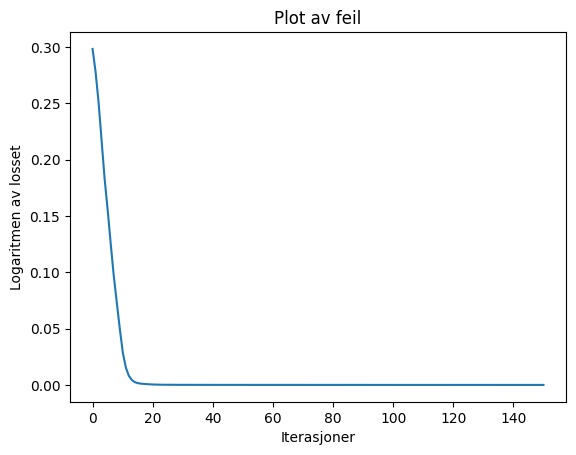

In [4]:
plt.plot(np.linspace(0,len(arr2),len(arr2)),arr2)
plt.xlabel('Iterasjoner')
plt.ylabel('Logaritmen av losset')
plt.title('Plot av feil')
plt.show()


### 3.3 med r=7 og m=5

In [5]:
#training the module
r = 7
m = 5
d = 20
k = 10
p = 25
L = 2
n_max = 2*r - 1
n_iter = 250
alpha = 0.001
num_of_samples = 250
num_train_batches = 10
num_test_batches = 1

data = get_train_test_sorting(r, m, num_of_samples, num_train_batches,num_test_batches)

loss = CrossEntropy()
feed_forward1 = FeedForward(d,p)
attention1 = Attention(d,k)
feed_forward2 = FeedForward(d,p)
attention2 = Attention(d,k)
embed_pos = EmbedPosition(n_max,m,d)
un_embed_pos = LinearLayer(d,m)
softmax = Softmax()
layers = [embed_pos, attention1,feed_forward1,attention2, feed_forward2, un_embed_pos, softmax]
nueralnetsortlong = NeuralNetwork(layers)

x = data['x_train']
y = data['y_train']
x_t = data['x_test'][0]
y_t = data['y_test'][0]

per, y_hat = sorting(nueralnetsortlong, x_t, y_t,m, r)
print(f'prosent av antall riktige sorteringer før trening er {per*100}%')

arr332 = algorithm_4_sort_finished(x, y, n_iter, alpha, m, nueralnetsortlong, r)

per_after, y_hat_after = sorting(nueralnetsortlong, x_t, y_t,m, r)

prosent av antall riktige sorteringer før trening er 0.0%
Epoch 10/250, Average Loss: 0.3779759773627782
Epoch 20/250, Average Loss: 0.2634570787262456
Epoch 30/250, Average Loss: 0.2078427066855776
Epoch 40/250, Average Loss: 0.18289821640057108
Epoch 50/250, Average Loss: 0.1703087396465034
Epoch 60/250, Average Loss: 0.15648591493258052
Epoch 70/250, Average Loss: 0.1455187224451499
Epoch 80/250, Average Loss: 0.1383105170219475
Epoch 90/250, Average Loss: 0.13137846047912083
Epoch 100/250, Average Loss: 0.12333302939793686
Epoch 110/250, Average Loss: 0.11207561265898251
Epoch 120/250, Average Loss: 0.09857102040680678
Epoch 130/250, Average Loss: 0.09343675451176969
Epoch 140/250, Average Loss: 0.12047393077064046
Epoch 150/250, Average Loss: 0.13803485272887464
Epoch 160/250, Average Loss: 0.1480852437153334
Epoch 170/250, Average Loss: 0.13437192745580293
Epoch 180/250, Average Loss: 0.12094148173890765
Epoch 190/250, Average Loss: 0.12691707775952127
Epoch 200/250, Average Loss

In [6]:
print(f'\nAccuracy after training {per_after*100}%')
for i in range(15):
    print(f'xt = {x_t[i]} yt = {y_t[i]} and z = {y_hat_after[i]}')


Accuracy after training 37.2%
xt = [1. 3. 2. 0. 4. 0. 3.] yt = [0. 0. 1. 2. 3. 3. 4.] and z = [0. 0. 1. 2. 3. 3. 4.]
xt = [3. 1. 2. 3. 2. 1. 2.] yt = [1. 1. 2. 2. 2. 3. 3.] and z = [0. 1. 1. 2. 2. 3. 3.]
xt = [0. 1. 0. 4. 1. 1. 4.] yt = [0. 0. 1. 1. 1. 4. 4.] and z = [0. 0. 1. 1. 1. 4. 4.]
xt = [2. 2. 3. 3. 2. 3. 1.] yt = [1. 2. 2. 2. 3. 3. 3.] and z = [0. 1. 2. 2. 3. 3. 3.]
xt = [0. 3. 3. 2. 2. 3. 1.] yt = [0. 1. 2. 2. 3. 3. 3.] and z = [1. 2. 2. 2. 3. 3. 3.]
xt = [4. 2. 4. 1. 3. 1. 3.] yt = [1. 1. 2. 3. 3. 4. 4.] and z = [0. 1. 2. 3. 3. 4. 4.]
xt = [3. 2. 0. 3. 0. 0. 4.] yt = [0. 0. 0. 2. 3. 3. 4.] and z = [1. 2. 2. 3. 3. 3. 4.]
xt = [3. 2. 0. 1. 0. 0. 4.] yt = [0. 0. 0. 1. 2. 3. 4.] and z = [1. 1. 1. 2. 2. 3. 4.]
xt = [4. 3. 0. 1. 3. 2. 0.] yt = [0. 0. 1. 2. 3. 3. 4.] and z = [0. 1. 1. 3. 3. 3. 4.]
xt = [3. 0. 0. 4. 0. 1. 1.] yt = [0. 0. 0. 1. 1. 3. 4.] and z = [0. 0. 0. 1. 2. 3. 4.]
xt = [3. 2. 4. 1. 0. 3. 0.] yt = [0. 0. 1. 2. 3. 3. 4.] and z = [0. 1. 2. 2. 3. 3. 4.]
xt = [4. 4. 

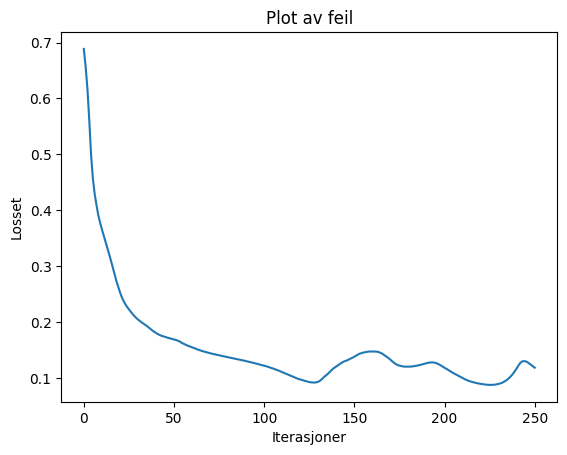

In [7]:
plt.plot(np.linspace(0,len(arr332),len(arr332)),arr332)
plt.xlabel('Iterasjoner')
plt.ylabel('Losset')
plt.title('Plot av feil')
plt.show()


In [8]:
#training the module
r = 7
m = 5
d = 20
k = 10
p = 25
L = 2
n_max = 2*r - 1
n_iter = 300
alpha = 0.001
num_of_samples = 250
num_train_batches = 10
num_test_batches = 1

data = get_train_test_sorting(r, m, num_of_samples, num_train_batches,num_test_batches)

loss = CrossEntropy()
feed_forward1 = FeedForward(d,p)
attention1 = Attention(d,k)
feed_forward2 = FeedForward(d,p)
attention2 = Attention(d,k)
embed_pos = EmbedPosition(n_max,m,d)
un_embed_pos = LinearLayer(d,m)
softmax = Softmax()
layers = [embed_pos, attention1,feed_forward1,attention2, feed_forward2, un_embed_pos, softmax]
nueralnetsort = NeuralNetwork(layers)

x = data['x_train']
y = data['y_train']
x_t = data['x_test'][0]
y_t = data['y_test'][0]

per, y_hat = sorting(nueralnetsort, x_t, y_t,m, r)
print(f'prosent av antall riktige sorteringer før trening er {per*100}%')
for i in range(y_hat.shape[0]):
    print(f'xt = {x_t[i]} yt = {y_t[i]} and z = {y_hat[i]}')
 
#arr = algorithm_4_sort(x, y, n_iter, alpha, m, nueralnetsort)


prosent av antall riktige sorteringer før trening er 0.0%
xt = [1. 4. 4. 2. 2. 4. 2.] yt = [1. 2. 2. 2. 4. 4. 4.] and z = [1. 4. 1. 1. 4. 2. 0.]
xt = [2. 3. 2. 1. 4. 0. 1.] yt = [0. 1. 1. 2. 2. 3. 4.] and z = [1. 4. 1. 1. 4. 2. 0.]
xt = [1. 0. 2. 4. 4. 1. 4.] yt = [0. 1. 1. 2. 4. 4. 4.] and z = [3. 4. 1. 1. 4. 2. 0.]
xt = [3. 2. 2. 2. 4. 0. 0.] yt = [0. 0. 2. 2. 2. 3. 4.] and z = [3. 4. 1. 1. 4. 2. 0.]
xt = [0. 3. 1. 4. 1. 0. 0.] yt = [0. 0. 0. 1. 1. 3. 4.] and z = [3. 4. 1. 1. 4. 2. 0.]
xt = [3. 4. 0. 3. 2. 3. 2.] yt = [0. 2. 2. 3. 3. 3. 4.] and z = [1. 4. 1. 1. 4. 2. 0.]
xt = [1. 0. 1. 2. 3. 3. 1.] yt = [0. 1. 1. 1. 2. 3. 3.] and z = [1. 4. 1. 1. 4. 2. 0.]
xt = [1. 4. 2. 0. 4. 4. 2.] yt = [0. 1. 2. 2. 4. 4. 4.] and z = [1. 4. 1. 1. 4. 2. 0.]
xt = [0. 1. 3. 0. 0. 1. 3.] yt = [0. 0. 0. 1. 1. 3. 3.] and z = [3. 4. 1. 1. 4. 2. 0.]
xt = [2. 0. 3. 4. 1. 4. 1.] yt = [0. 1. 1. 2. 3. 4. 4.] and z = [1. 4. 1. 1. 4. 2. 0.]
xt = [4. 2. 3. 4. 4. 2. 3.] yt = [2. 2. 3. 3. 4. 4. 4.] and z = [3. 4. 1

In [9]:
plt.plot(np.arange(len(arr)),arr)
plt.xlabel('Iterasjoner')
plt.ylabel('Logaritmen av losset')
plt.title('Plot av feil for sortering')
plt.show()
per, z_hat = sorting(nueralnetsort, x_t, y_t,m, r)
np.set_printoptions(threshold=np.inf)

for i in range(250):
    print(f'yt = {y_t[i]} and z = {z_hat[i]}')
print(f'prosent av antall riktige sorteringer etter trening er {per*100}%')

NameError: name 'arr' is not defined

#### 3.4 - Addisjon

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from layers import *
from neural_network import NeuralNetwork
from utils import onehot
from data_generators import get_train_test_addition
from training import *

datapunkter = 150
batches = 20

d = 30
k = 20
p = 40
L = 3
m = 10
r = 2
n_max = r*3
n_iter = 250
alpha = 0.001

data_add = get_train_test_addition(r, datapunkter, batches)

feed_forward1 = FeedForward(d,p)
attention1 = Attention(d,k)
feed_forward2 = FeedForward(d,p)
attention2 = Attention(d,k)
feed_forward3 = FeedForward(d,p)
attention3 = Attention(d,k)
feed_forward4 = FeedForward(d,p)
attention4 = Attention(d,k)
embed_pos = EmbedPosition(n_max,m,d)
un_embed_pos = LinearLayer(d,m)
softmax = Softmax()
layers = [embed_pos, attention1, feed_forward1, attention2, feed_forward2, attention3, feed_forward3, un_embed_pos, softmax]
nueralnetadd = NeuralNetwork(layers)

x_add = data_add['x_train']
y_add = data_add['y_train']
y_add_t = data_add['y_test'][0]
x_add_t = data_add['x_test'][0]



/var/folders/m1/0pv5jqcs6h34_x160t92550h0000gn/T/ipykernel_11618/2640456503.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
per, z_hat = accuracy_addition(nueralnetadd, x_add_t, y_add_t, m,r)
print(f'prosent av antall riktige addisjoner før trening er {per*100}%')

# print first 10 datapoints
for i in range(10):
    print(f'x = {x_add_t[i]} y = {y_add_t[i]}, z = {z_hat[i]}')

Shape of one-hot encoded X in accuracy_addition: (150, 10, 4)
Shape of one-hot encoded X in accuracy_addition: (150, 10, 5)
prosent av antall riktige addisjoner før trening er 0.0%
x = [1 1 6 5] y = [0 7 6], z = [5 3 6]
x = [3 2 4 9] y = [0 8 1], z = [9 3 6]
x = [7 8 1 7] y = [0 9 5], z = [7 4 4]
x = [3 3 7 2] y = [1 0 5], z = [2 3 6]
x = [2 7 1 2] y = [0 3 9], z = [2 6 7]
x = [4 0 5 2] y = [0 9 2], z = [2 3 6]
x = [7 2 4 3] y = [1 1 5], z = [3 3 6]
x = [2 0 6 0] y = [0 8 0], z = [0 3 6]
x = [4 8 1 7] y = [0 6 5], z = [7 4 4]
x = [5 0 2 8] y = [0 7 8], z = [8 3 6]


In [3]:
addrr2 = algorithm_4_addition_finished(x_add, y_add, n_iter, alpha, m, nueralnetadd, r)

Epoch 10/150, Average Loss: 0.7383940381968407
Epoch 20/150, Average Loss: 0.689511553723053
Epoch 30/150, Average Loss: 0.6736594104127391
Epoch 40/150, Average Loss: 0.684021517097582
Epoch 50/150, Average Loss: 0.6869120186734047
Epoch 60/150, Average Loss: 0.7143153865762527
Epoch 70/150, Average Loss: 0.6954810580542258
Epoch 80/150, Average Loss: 0.8087219501067983
Epoch 90/150, Average Loss: 0.7564168644535674
Epoch 100/150, Average Loss: 0.7516110588477275
Epoch 110/150, Average Loss: 0.7460575393958976
Epoch 120/150, Average Loss: 0.7484846365946795
Epoch 130/150, Average Loss: 0.7439994416815997
Epoch 140/150, Average Loss: 0.7498729565000296
Epoch 150/150, Average Loss: 0.7394992667298407


In [ ]:

per, z_hat = sorting(nueralnetadd, x_add_t, y_add_t, m,r+1)
print(f'prosent av antall riktige addisjoner før trening er {per*100}%')

for i in range(y_add_t.shape[0]):
    print(f'xt= {x_add_t[i]}, yt = {y_add_t[i]} and z = {z_hat[i]}')

#arr3 = algorithm_4_add(x_add, y_add, n_iter, alpha, m,r,  nueralnetadd)

prosent av antall riktige addisjoner før trening er 0.0%
xt= [6 3 1 5], yt = [0 7 8] and z = [2 0 0]
xt= [4 1 0 7], yt = [0 4 8] and z = [6 0 1]
xt= [0 4 7 4], yt = [0 7 8] and z = [3 0 1]
xt= [4 3 1 7], yt = [0 6 0] and z = [9 0 1]
xt= [8 7 0 3], yt = [0 9 0] and z = [1 1 1]
xt= [2 5 9 6], yt = [1 2 1] and z = [0 0 1]
xt= [1 5 3 9], yt = [0 5 4] and z = [9 0 0]
xt= [3 8 4 9], yt = [0 8 7] and z = [2 0 1]
xt= [1 1 6 5], yt = [0 7 6] and z = [2 0 1]
xt= [2 9 3 5], yt = [0 6 4] and z = [2 0 0]
xt= [5 3 7 6], yt = [1 2 9] and z = [0 0 1]
xt= [1 1 9 8], yt = [1 0 9] and z = [0 0 1]
xt= [0 8 6 3], yt = [0 7 1] and z = [0 0 1]
xt= [8 1 7 9], yt = [1 6 0] and z = [3 1 1]
xt= [0 4 9 5], yt = [0 9 9] and z = [2 0 1]
xt= [6 7 9 6], yt = [1 6 3] and z = [1 1 1]
xt= [1 1 6 1], yt = [0 7 2] and z = [0 0 0]
xt= [8 2 6 9], yt = [1 5 1] and z = [3 0 1]
xt= [0 3 0 8], yt = [0 1 1] and z = [9 9 0]
xt= [7 7 5 4], yt = [1 3 1] and z = [3 1 1]
xt= [7 7 2 3], yt = [1 0 0] and z = [6 0 1]
xt= [1 2 4 5], yt =

In [ ]:
plt.plot(np.arange(len(addrr2)),addrr2)
plt.xlabel('Iterasjoner')
plt.ylabel('Logaritmen av losset')
plt.title('Plot av feil for addisjon')
plt.show()

y_add_t = data_add['y_test'][0]
x_add_t = data_add['x_test'][0]

per, z_hat = sorting(nueralnetadd, x_add_t, y_add_t,m,r+1)
print(f'prosent av antall riktige addisjoner er {per*100}%')

for i in range(y_add_t.shape[0]):
    #print(f'x train {x[0][i]} y train{y[0][i]}')
    print(f'yt = {y_add_t[i]} and z = {z_hat[i]}')